In [20]:
# Importing the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline 
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , r2_score

In [21]:
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True) 
# returns 2 dataframes 
# 1. X(indepedent values) 
# 2. y(depedent value)

In [22]:
X.head(10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504


In [23]:
y.head()


0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [24]:
X.shape , y.shape

((442, 10), (442,))

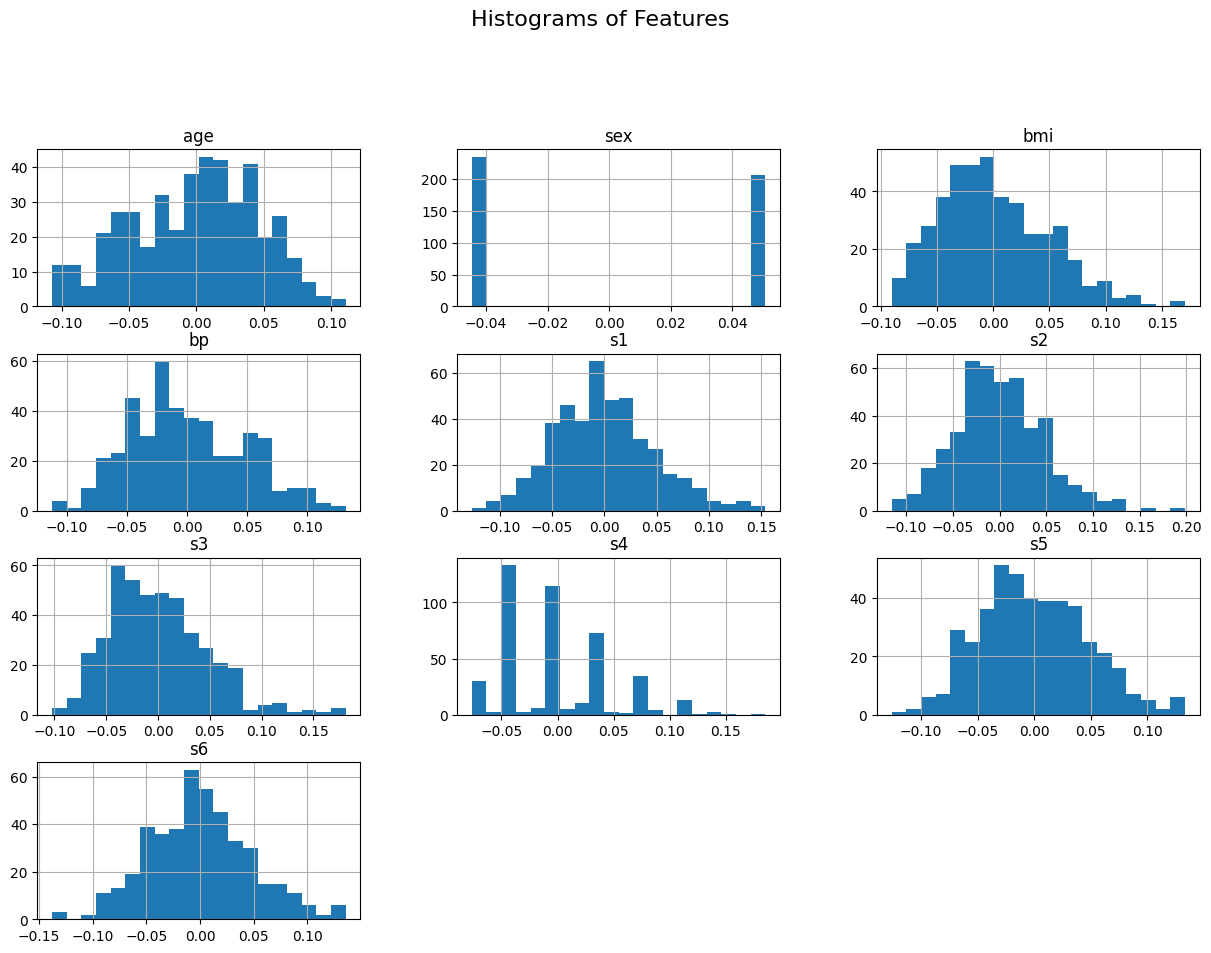

In [25]:
# Plot histograms for each feature
X.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Features', x=0.5, y=1.02, fontsize=16)
plt.show()

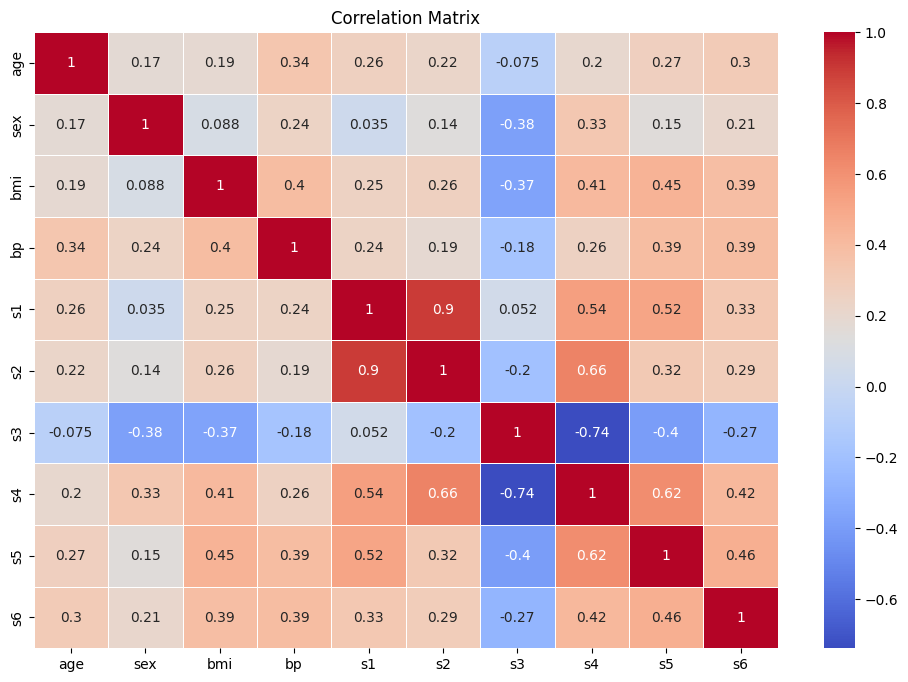

In [26]:
# Plot a correlation matrix
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [27]:
# Split the data into train, validation, and test sets
#train_X_LS, temp_X_LS, train_y_LS, temp_y_LS = train_test_split(X_LS, y_LS, test_size=0.3, random_state=42)
#val_X_LS, test_X_LS, val_y_LS, test_y_LS = train_test_split(temp_X_LS, temp_y_LS, test_size=0.5, random_state=42)
#Get the data, and run a train-validation-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

In [28]:
#Run a multivariate linear regression on all variables

model_LS = LinearRegression()
model_LS.fit(X_train,y_train)

LinearRegression()

In [29]:
#LinearRegression()
# Make predictions using the testing set
y_pred_LS = model_LS.predict(X_val)
y_pred_train_LS = model_LS.predict(X_train)

# The coefficients and intercept
print('Coefficients or the Slope(m) of the model is: ')
cols = X.columns
equ =  f"y = {model_LS.intercept_:.2f}"
for i,j in  enumerate(model_LS.coef_):
    print(f'{cols[i]}\t {j}')
    equ += f'+ {j:.2f}x^{i+1}'
print('intercept(c) of the model is: \t',model_LS.intercept_)
print('Equation: ',equ)

Coefficients or the Slope(m) of the model is: 
age	 -100.50163553582937
sex	 -183.850673420498
bmi	 654.017865332761
bp	 340.6677157107508
s1	 -1224.3775011655346
s2	 729.5629338524593
s3	 294.71291332294317
s4	 316.1402091658433
s5	 694.8615907585722
s6	 85.52265874167185
intercept(c) of the model is: 	 154.54003735453978
Equation:  y = 154.54+ -100.50x^1+ -183.85x^2+ 654.02x^3+ 340.67x^4+ -1224.38x^5+ 729.56x^6+ 294.71x^7+ 316.14x^8+ 694.86x^9+ 85.52x^10


In [30]:
# Making function for building a pipeline
def makeModelPipe(X_data,y_data):
    model = Pipeline([('polynomial', PolynomialFeatures(degree=2 , include_bias=False)), 
                    ('linear', LinearRegression())])
    return model.fit(X_data, y_data)


In [31]:
# making function for visualization
def plot_model(X, y, model):
    # Calculate the number of rows and columns for the subplots
    X_lin = np.linspace(min(X), max(X), 100)
    plt.figure(figsize=[15,7])
    plt.title('')
    plt.scatter(X, y, s=20, label="data")
    plt.plot(X_lin, model.predict(X_lin),color='r', label="Model", lw=3)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.legend()
    plt.show()

In [37]:
#Run a polynomial regression of the 2nd degree on the BMI feature alone

# Getting only the bmi data
X_train_bmi = np.array(X_train['bmi']).reshape(-1,1)
X_val_bmi = np.array(X_val['bmi']).reshape(-1,1)

# Make predictions using the testing set
bmi_model = makeModelPipe(X_train_bmi,y_train)
y_pred_bmi = bmi_model.predict(X_val_bmi)
y_pred_train_bmi = bmi_model.predict(X_train_bmi)

#getequ(bmi_model)

In [38]:
#Run a multivariate polynomial regression of the 2nd degree on all variables.

# Make predictions using the testing set


model_plot_LS = makeModelPipe(X_train,y_train)
y_pred_plot_LS = model_plot_LS.predict(X_val)
y_pred_train_plot_LS = model_plot_LS.predict(X_train)



In [39]:
#Compare the three models by looking at R-squared, MAPE and MAE.
def getMetrics(y,y_pred):
    print(f'Mean Absolute Precentage error: {(mean_absolute_percentage_error(y, y_pred)*100):.2f}%')
    print(f'Mean Absolute error: {mean_absolute_error(y, y_pred):.2f}')
    print(f'The model is preforming {r2_score(y,y_pred)*100:.2f}% better than a navie model')


In [40]:
# Comparing all the models on training data
print('For multi Linear Regression model')
getMetrics(y_train, y_pred_train_LS)
print('=' * 10, end='\n')  # Adjust the number of equals signs as needed

print('For Polynomial Regression model on BMI')
getMetrics(y_train, y_pred_train_bmi)
print('=' * 10, end='\n')  # Adjust the number of equals signs as needed

print('For Polynomial Regression model on All data')
getMetrics(y_train, y_pred_train_plot_LS)
print('=' * 10, end='\n')  # Adjust the number of equals signs as needed

For multi Linear Regression model
Mean Absolute Precentage error: 38.40%
Mean Absolute error: 42.61
The model is preforming 52.43% better than a navie model
For Polynomial Regression model on BMI
Mean Absolute Precentage error: 43.99%
Mean Absolute error: 47.55
The model is preforming 42.17% better than a navie model
For Polynomial Regression model on All data
Mean Absolute Precentage error: 28.51%
Mean Absolute error: 32.34
The model is preforming 71.18% better than a navie model


In [42]:
# Comparing all the models on Validation data

print('For multi Linear Regression model')
getMetrics(y_val,y_pred_LS)
print('='* 10 , end = '\n')

print('For Polynomial Regession model on BMI')
getMetrics(y_val,y_pred_bmi)
print('='* 10 , end = '\n')

print('For Polynomial Regession model on All data')
getMetrics(y_train, y_pred_train_plot_LS)
print('='* 10 , end = '\n')

For multi Linear Regression model
Mean Absolute Precentage error: 44.87%
Mean Absolute error: 46.90
The model is preforming 48.97% better than a navie model
For Polynomial Regession model on BMI
Mean Absolute Precentage error: 54.69%
Mean Absolute error: 56.36
The model is preforming 28.15% better than a navie model
For Polynomial Regession model on All data
Mean Absolute Precentage error: 28.51%
Mean Absolute error: 32.34
The model is preforming 71.18% better than a navie model


In [ ]:
# Comparing all the models on Validation data

print('For multi Linear Regression model')
getMetrics(y_val,y_pred_all)
print('='* 10 , end = '\n')

print('For Polynomial Regession model on BMI')
getMetrics(y_val,y_pred_bmi)
print('='* 10 , end = '\n')

print('For Polynomial Regession model on All data')
getMetrics(y_val,y_pred_plot_LS)
print('='* 10 , end = '\n')

For multi Linear Regression model
Mean Absolute Precentage error: 44.87%
Mean Absolute error: 46.90
The model is preforming 48.97% better than a navie model
For Polynomial Regession model on BMI
Mean Absolute Precentage error: 54.69%
Mean Absolute error: 56.36
The model is preforming 28.15% better than a navie model
For Polynomial Regession model on All data
Mean Absolute Precentage error: 59.83%
Mean Absolute error: 65.39
The model is preforming -26.96% better than a navie model


In [ ]:
# Comparing all the models on Test data

print('For multi Linear Regression model')
y_pred_test_all = model_LS.predict(X_test)
getMetrics(y_test,y_pred_test_all)
print('='* 10 , end = '\n')

print('For Polynomial Regession model on BMI')
y_pred_test_bmi = bmi_model.predict(np.array(X_test['bmi']).reshape(-1,1))
getMetrics(y_test,y_pred_test_bmi)
print('='* 10 , end = '\n')

print('For Polynomial Regession model on All data')
y_pred_test_ploy_all = model_plot_LS.predict(X_test)
getMetrics(y_test,y_pred_test_ploy_all)
print('='* 10 , end = '\n')

For multi Linear Regression model
Mean Absolute Precentage error: 38.31%
Mean Absolute error: 42.71
The model is preforming 46.25% better than a navie model
For Polynomial Regession model on BMI
Mean Absolute Precentage error: 44.88%
Mean Absolute error: 51.05
The model is preforming 25.55% better than a navie model
For Polynomial Regession model on All data
Mean Absolute Precentage error: 49.95%
Mean Absolute error: 57.78
The model is preforming -0.58% better than a navie model


Which model would you choose for deployment, and why?

-Multi Variant Linear Regression

-In comparison to the other models, it has the greatest R-squared value (0.4506), meaning that it explains more variance in the target variable.

-The Multivariate Linear Regression has the lowest MAPE (36.83), which demonstrates that, generally speaking, its predictions are the closest to the actual values.